In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-census-income-dataset/adult.csv


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('/kaggle/input/adult-census-income-dataset/adult.csv')

In [4]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data.shape

(32561, 15)

In [7]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

1. Age Distribution
Let's start with a histogram of the age distribution.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


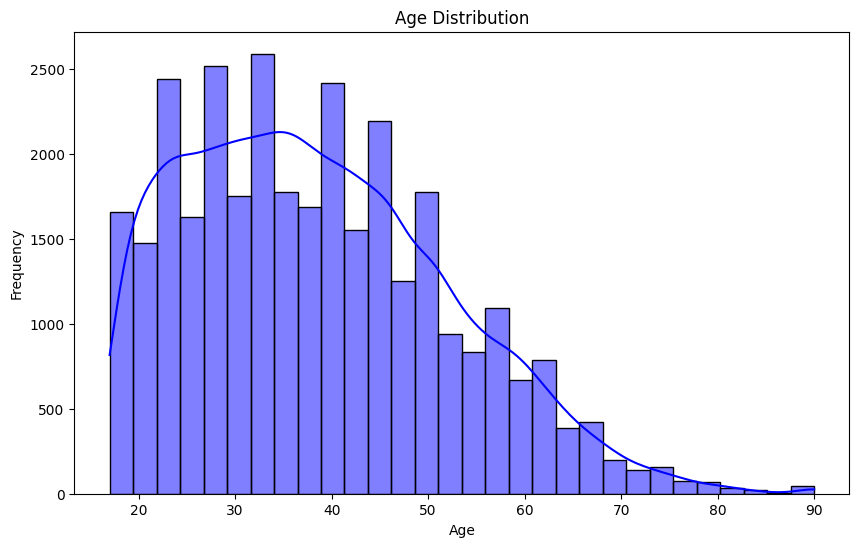

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


2. Income Distribution
Let's visualize the distribution of the income variable.

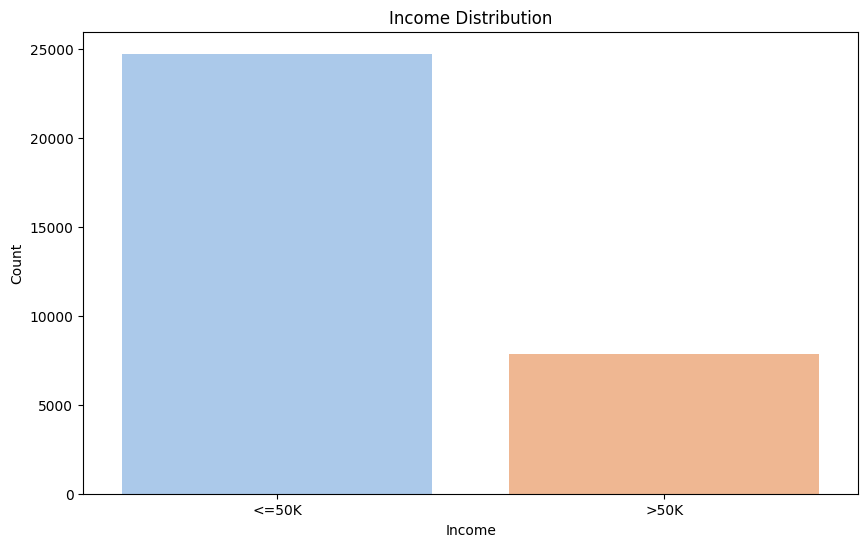

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='income', data=data, palette='pastel')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


3. Education Level Distribution
Let's visualize the distribution of the education levels.

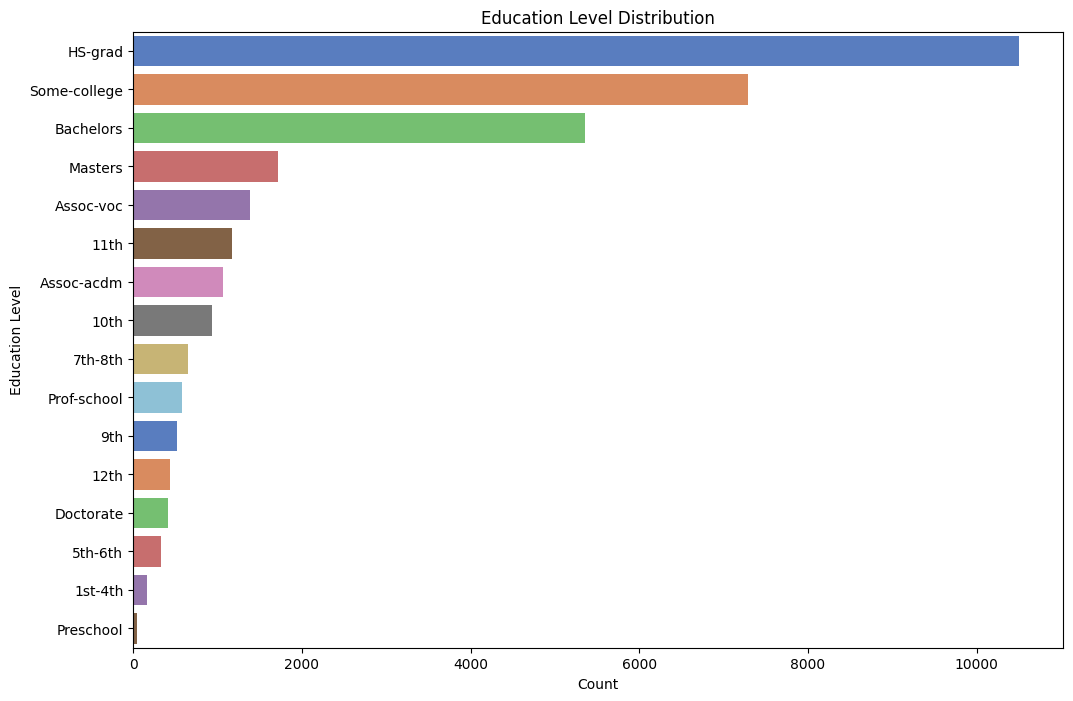

In [11]:
plt.figure(figsize=(12, 8))
sns.countplot(y='education', data=data, palette='muted', order=data['education'].value_counts().index)
plt.title('Education Level Distribution')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()


4. Hours Worked Per Week
Let's visualize the distribution of hours worked per week.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


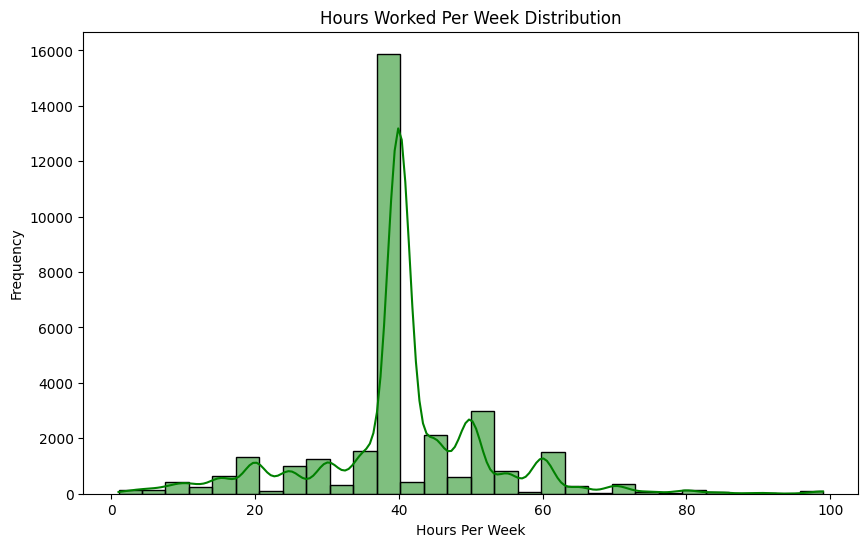

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['hours.per.week'], kde=True, bins=30, color='green')
plt.title('Hours Worked Per Week Distribution')
plt.xlabel('Hours Per Week')
plt.ylabel('Frequency')
plt.show()


5. Income vs. Age
Let's visualize the relationship between income and age using a boxplot.

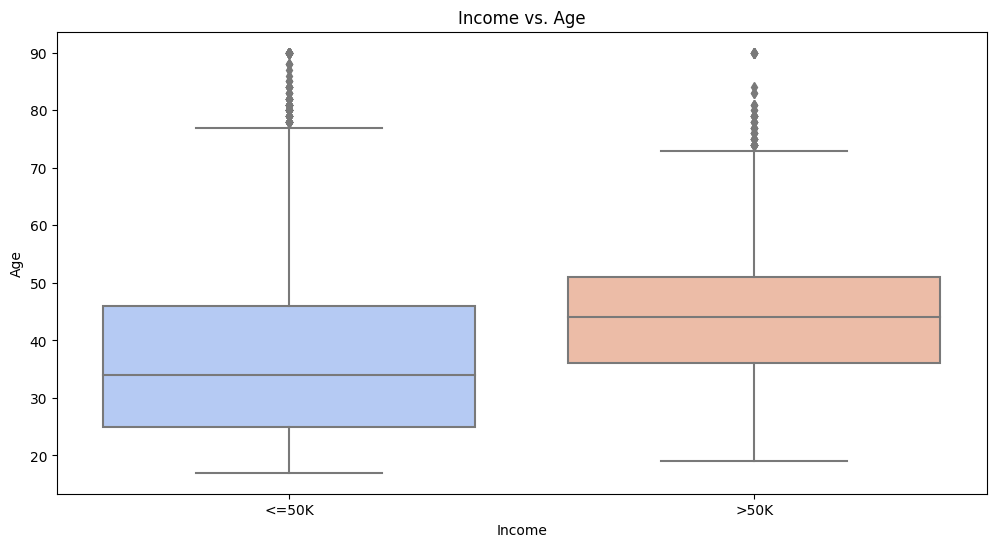

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='income', y='age', data=data, palette='coolwarm')
plt.title('Income vs. Age')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()


6. Income vs. Hours Worked Per Week
Let's visualize the relationship between income and hours worked per week using a boxplot.

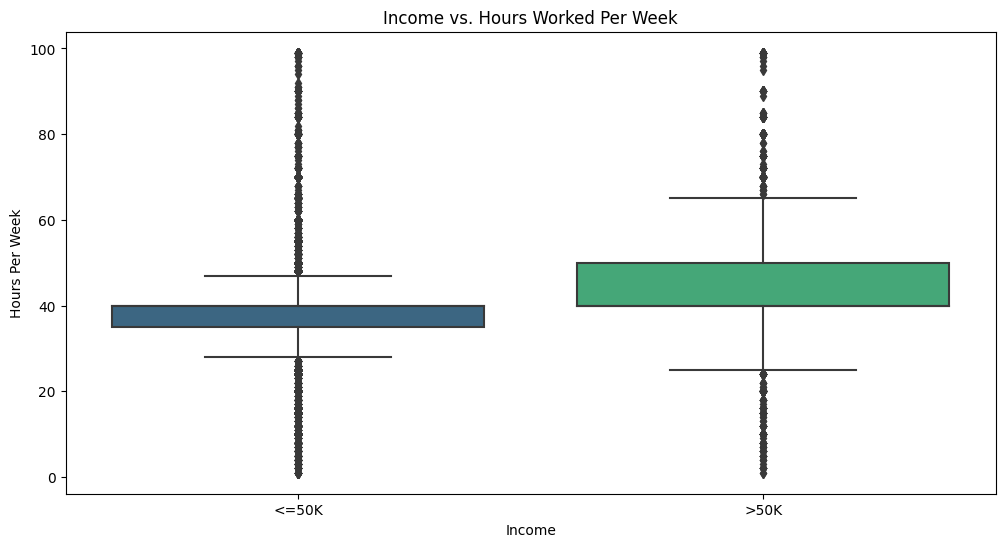

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='income', y='hours.per.week', data=data, palette='viridis')
plt.title('Income vs. Hours Worked Per Week')
plt.xlabel('Income')
plt.ylabel('Hours Per Week')
plt.show()


7. Education vs. Income
Let's visualize the relationship between education levels and income.

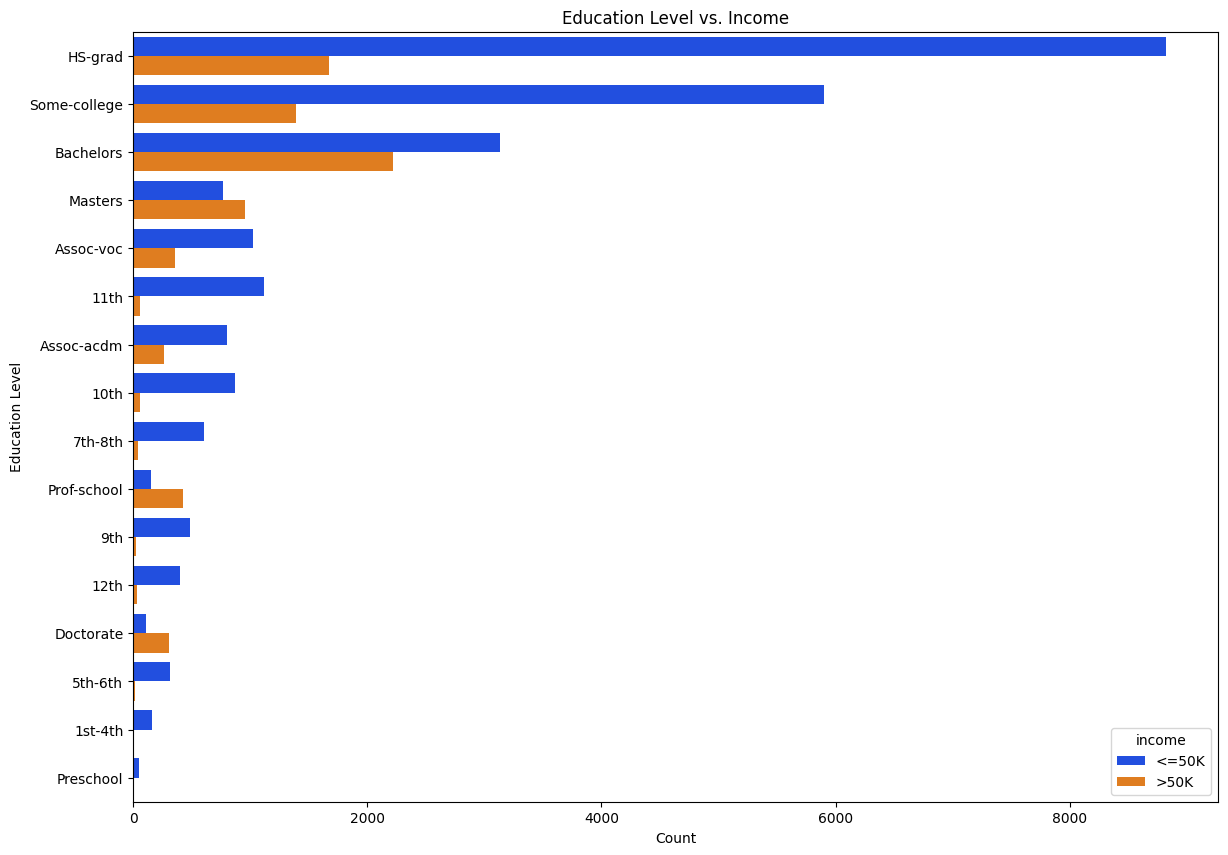

In [15]:
plt.figure(figsize=(14, 10))
sns.countplot(y='education', hue='income', data=data, palette='bright', order=data['education'].value_counts().index)
plt.title('Education Level vs. Income')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()


8. Race Distribution
Let's visualize the distribution of race in the dataset.

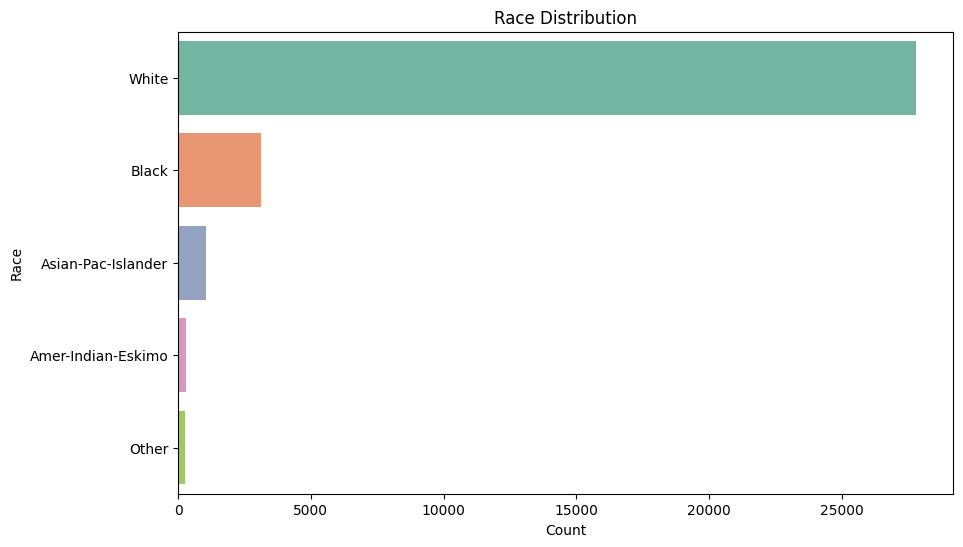

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(y='race', data=data, palette='Set2', order=data['race'].value_counts().index)
plt.title('Race Distribution')
plt.xlabel('Count')
plt.ylabel('Race')
plt.show()


9. Sex Distribution
Let's visualize the distribution of sex in the dataset.

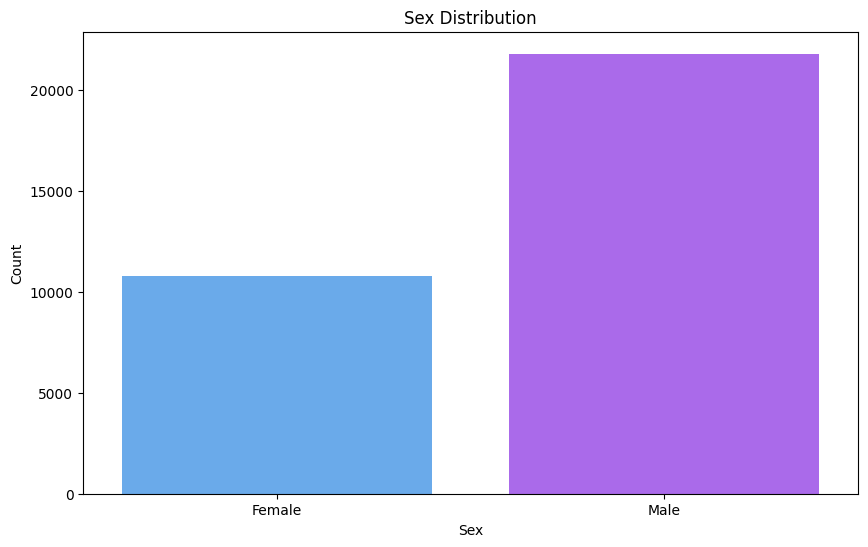

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=data, palette='cool')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


10. Workclass Distribution
Let's visualize the distribution of workclass.

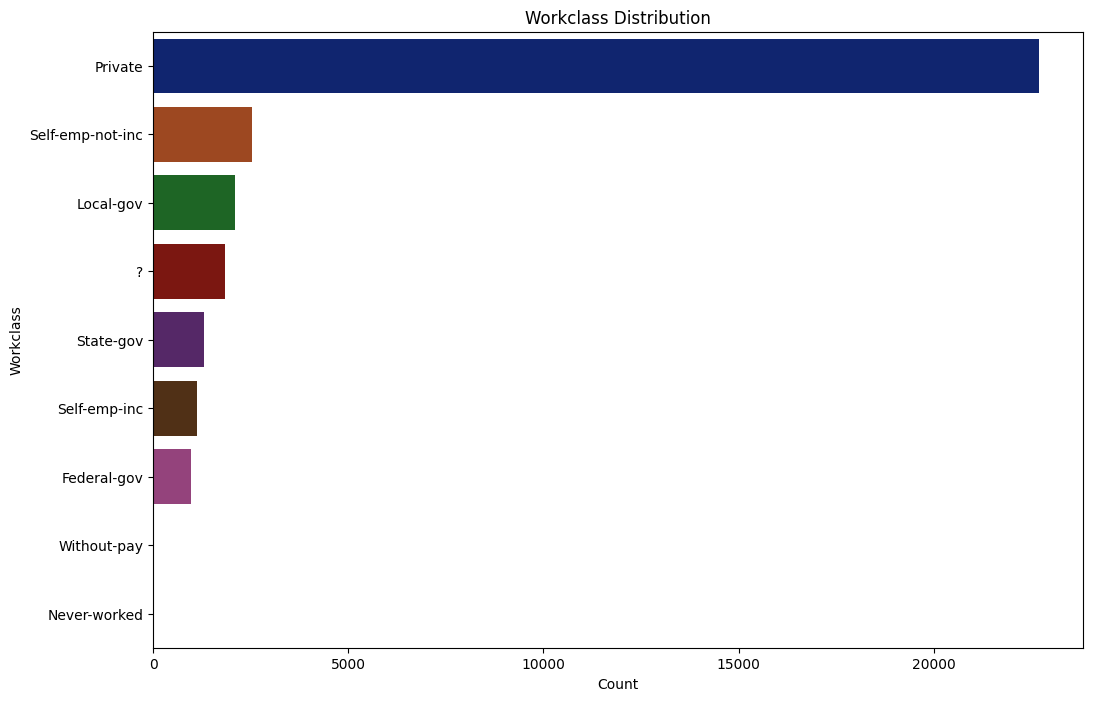

In [18]:
plt.figure(figsize=(12, 8))
sns.countplot(y='workclass', data=data, palette='dark', order=data['workclass'].value_counts().index)
plt.title('Workclass Distribution')
plt.xlabel('Count')
plt.ylabel('Workclass')
plt.show()


These visualizations should help provide a clearer understanding of the dataset's characteristics and distributions.